In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fe_partition_calc import fe_partition, monte_carlo_iter
sns.set_style("whitegrid")

df = pd.read_excel('Iron_speciation_calculator_input.xlsx')
df.head()

,sample_index,temperature,pressure,log_fO2,SiO2,TiO2,Al2O3,FeO,MnO,MgO,...,Al2O3_std,FeO_std,MnO_std,MgO_std,CaO_std,Na2O_std,K2O_std,P2O5_std,NiO_std,Cr2O3_std
0,NM20ON179-NAB117,1170,100000,-5.77,46.247722,3.248235,13.472798,10.407235,0.177153,7.888806,...,0.082397,0.283317,0.024013,0.066346,0.194975,0.024843,0.044814,0.054433,0.030330,0.022117
1,NY17-209-NAB117,1170,100000,-5.77,41.935408,3.655850,12.241605,10.977930,0.207853,8.442607,...,0.089664,0.467337,0.019052,0.265025,0.336643,0.114493,0.027430,0.087918,0.043071,0.029903
2,AZKS052-NAB117,1170,100000,-5.77,47.535735,2.970344,14.685916,10.288859,0.148575,8.453016,...,0.124454,0.296162,0.032290,0.098748,0.156598,0.155809,0.040070,0.048395,0.031297,0.018810
3,FOGO16-NAB117,1170,100000,-5.77,44.769360,3.274605,13.554178,11.396633,0.203816,8.472814,...,0.109499,0.273379,0.047058,0.090525,0.174016,0.121950,0.041232,0.044732,0.036494,0.015852
4,TDC69-NAB117,1170,100000,-5.77,45.970173,3.371518,13.137186,11.817337,0.158192,7.884144,...,0.130510,0.401834,0.031720,0.077891,0.126857,0.091134,0.025369,0.069086,0.017812,0.021225


#### Generate monte carlo dataframe

In [3]:
#Change number to reflect how many new liquid compositions you wish to generate for that sample
mc_df = monte_carlo_iter(df, 5000)
mc_df.head()

,index,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,Cr2O3,sample_index,temperature,pressure,log_fO2
0,0.0,46.066638,3.156284,13.542717,10.762905,0.154897,7.890797,13.429415,2.419858,2.277241,0.473766,0.000000,0.001470,NM20ON179-NAB117,1170,100000,-5.77
1,0.0,46.153245,3.325360,13.537231,10.626393,0.209004,7.854679,13.094938,2.422552,2.338296,0.516237,0.039422,0.004561,NM20ON179-NAB117,1170,100000,-5.77
2,0.0,46.409937,3.240411,13.391079,10.321405,0.208575,7.833136,13.615525,2.435535,2.248186,0.604658,0.000000,0.000002,NM20ON179-NAB117,1170,100000,-5.77
3,0.0,46.206892,3.287644,13.488510,10.501717,0.157135,7.890024,13.258717,2.455951,2.304285,0.554748,0.000000,0.020554,NM20ON179-NAB117,1170,100000,-5.77
4,0.0,46.388423,3.208661,13.506511,10.124587,0.210059,7.868925,13.203531,2.427079,2.254345,0.438181,0.071917,0.029775,NM20ON179-NAB117,1170,100000,-5.77


#### Input montecarlo dataframe into fe_partition function

##### Run single model

In [4]:
Putirka_2016 = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'] + 273.15, mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model='Putirka_2016')

##### Run all models

In [5]:
models = ["IrvineBarager_1971",
            "LeMaitre_1976",
            "Sack_1980",
            "Kress_1991",
            "Kress_1991_lowp",
            "Jayasuriya_2004",
            "Putirka_2016",
            "ONeill_2018",
            "Borisov_2018"]

df_all_models = pd.DataFrame()

for model in models:
    df_fe = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'] + 273.15, mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model=model)
    df_fe['model'] = model
    df_all_models = pd.concat([df_all_models, df_fe])

##### Run a chosen selection of models

In [6]:
models_selection = ["Sack_1980",
                    "Kress_1991",
                    "Kress_1991_lowp",
                    "Jayasuriya_2004",
                    "Putirka_2016",
                    "ONeill_2018",
                    "Borisov_2018"]

df_models_selection = pd.DataFrame()

for model in models_selection:
    df_fe = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'] + 273.15, mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model=model)
    df_fe['model'] = model
    df_models_selection = pd.concat([df_models_selection, df_fe])

### Plot output data

##### Single model

Text(0.5, 0.98, 'AZKS052-NAB117')

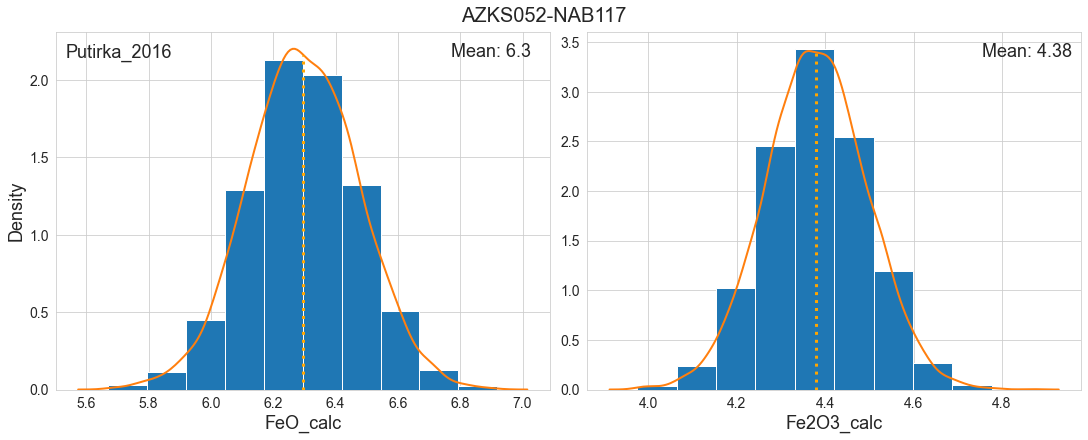

In [7]:
sample_feo = Putirka_2016[Putirka_2016['sample_index'] == 'AZKS052-NAB117']['FeO_calc']
sample_fe2o3 = Putirka_2016[Putirka_2016['sample_index'] == 'AZKS052-NAB117']['Fe2O3_calc']

fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True, sharex='col')

#Plot histogram
ax[0].hist(sample_feo, density=True)
ax[1].hist(sample_fe2o3, density=True)

#Plot KDE
sns.kdeplot(sample_feo, linewidth=2, ax=ax[0])
sns.kdeplot(sample_fe2o3, linewidth=2, ax=ax[1])

#Calculate means and plot as line
sample_feo_mean = sample_feo.mean()
kdeline_feo = ax[0].lines[0]
xs = kdeline_feo.get_xdata()
ys = kdeline_feo.get_ydata()
height_feo = np.interp(sample_feo_mean, xs, ys)
ax[0].vlines(sample_feo_mean, 0, height_feo, 'orange', linewidth=3, ls=':')

sample_fe2o3_mean = sample_fe2o3.mean()
kdeline_fe2o3 = ax[1].lines[0]
xs = kdeline_fe2o3.get_xdata()
ys = kdeline_fe2o3.get_ydata()
height_feo = np.interp(sample_fe2o3_mean, xs, ys)
ax[1].vlines(sample_fe2o3_mean, 0, height_feo, 'orange', linewidth=3, ls=':')


ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

ax[0].annotate("Putirka_2016", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=18)
ax[0].annotate('Mean: {}'.format(round(sample_feo_mean,2)), xy=(0.8, 0.93), xycoords="axes fraction", fontsize=18)
ax[1].annotate('Mean: {}'.format(round(sample_fe2o3_mean,2)), xy=(0.8, 0.93), xycoords="axes fraction", fontsize=18)

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('AZKS052-NAB117', fontsize=20)

##### All models

Text(0.5, 0.98, 'AZKS052-NAB117')

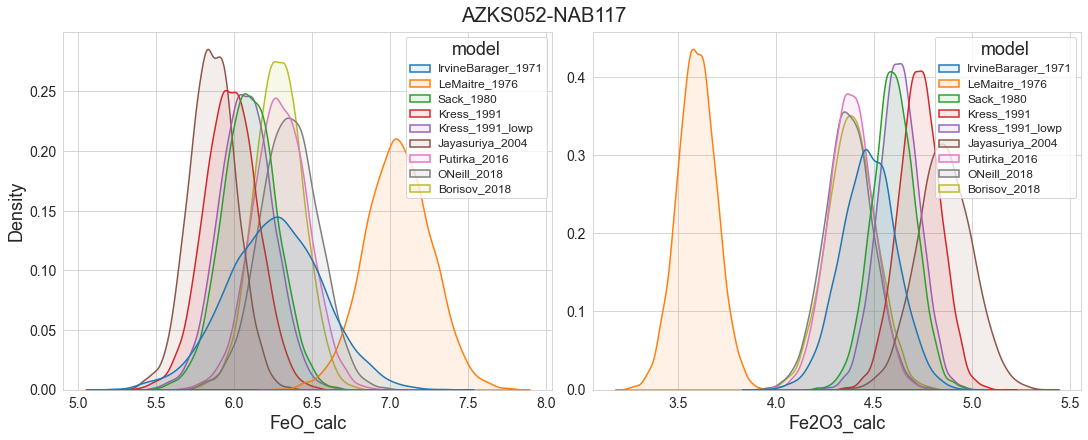

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True)

sns.set_style("whitegrid")
feo_plt = sns.kdeplot(data=df_all_models[df_all_models['sample_index'] == 'AZKS052-NAB117'].reset_index(), x="FeO_calc", hue="model",  linewidth=1.5, alpha=0.1, fill=True, ax=ax[0])
fe2o3_plt = sns.kdeplot(data=df_all_models[df_all_models['sample_index'] == 'AZKS052-NAB117'].reset_index(), x="Fe2O3_calc", hue="model", linewidth=1.5, alpha=0.1, fill=True, ax=ax[1])

ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

plt.setp(feo_plt.get_legend().get_texts(), fontsize='12')
plt.setp(feo_plt.get_legend().get_title(), fontsize='18') 
plt.setp(fe2o3_plt.get_legend().get_texts(), fontsize='12')
plt.setp(fe2o3_plt.get_legend().get_title(), fontsize='18') 

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('AZKS052-NAB117', fontsize=20)

##### Subset of models

Text(0.5, 0.98, 'AZKS052-NAB117')

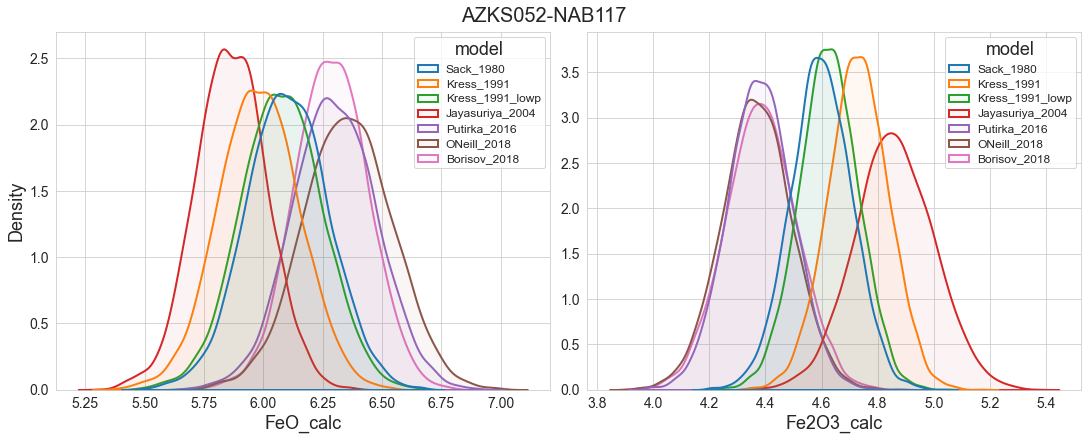

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True)

sns.set_style("whitegrid")
feo_plt = sns.kdeplot(data=df_models_selection[df_models_selection['sample_index'] == 'AZKS052-NAB117'].reset_index(), x="FeO_calc", common_norm=False, hue="model",  linewidth=2, alpha=0.05, fill=True, ax=ax[0])
fe2o3_plt = sns.kdeplot(data=df_models_selection[df_models_selection['sample_index'] == 'AZKS052-NAB117'].reset_index(), x="Fe2O3_calc", common_norm=False, hue="model", linewidth=2, alpha=0.05, fill=True, ax=ax[1])

ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

plt.setp(feo_plt.get_legend().get_texts(), fontsize='12')
plt.setp(feo_plt.get_legend().get_title(), fontsize='18') 
plt.setp(fe2o3_plt.get_legend().get_texts(), fontsize='12')
plt.setp(fe2o3_plt.get_legend().get_title(), fontsize='18') 

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('AZKS052-NAB117', fontsize=20)

### Generate data tables

##### Single model

In [10]:
#One sample at a time
np.mean(Putirka_2016[Putirka_2016['sample_index'] == 'NM20ON179-NAB117']['FeO_calc'])

5.841368228286576

In [11]:
#Table for all samples
#sort = False will preserve order of samples in input sheet, True will sort alphabetically
Putirka_2016.groupby('sample_index', sort=False)[['Fe3Fetot','FeO_calc', 'Fe2O3_calc' ]].agg(['median', 'mean', 'std']) 

Fe3Fetot                      FeO_calc                      \
                    median      mean       std    median      mean       std   
sample_index                                                                   
NM20ON179-NAB117  0.436038  0.436050  0.002232  5.839530  5.841368  0.153310   
NY17-209-NAB117   0.474765  0.474757  0.004641  5.735529  5.737016  0.238035   
AZKS052-NAB117    0.384931  0.384975  0.004748  6.294736  6.296788  0.177157   
FOGO16-NAB117     0.403007  0.402983  0.004003  6.772089  6.771713  0.161204   
TDC69-NAB117      0.421109  0.421114  0.003249  6.797581  6.795728  0.220271   
NM20ON179-test_0  0.436085  0.436068  0.002242  5.839206  5.840812  0.151490   

                 Fe2O3_calc                      
                     median      mean       std  
sample_index                                     
NM20ON179-NAB117   5.017590  5.019175  0.116356  
NY17-209-NAB117    5.763458  5.761837  0.208507  
AZKS052-NAB117     4.379509  4.379997  0.115002  
FOGO16-NAB117      5.078687  5.079544  0.111454  
TDC69-NAB117       5.495484  5.493481  0.159255  
NM20ON179-test_0   5.018838  5.019077  0.115392

##### All models

In [12]:
df_stats = pd.DataFrame()

for model in models:
    df_iter = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False)[['Fe3Fetot','FeO_calc', 'Fe2O3_calc' ]].agg(['median', 'mean', 'std'])
    df_iter['model'] = model
    df_stats = pd.concat([df_stats, df_iter])
    
df_stats.head()

Fe3Fetot                      FeO_calc                      \
                    median      mean       std    median      mean       std   
sample_index                                                                   
NM20ON179-NAB117  0.410571  0.410662  0.011888  6.134176  6.136958  0.269139   
NY17-209-NAB117   0.422019  0.422823  0.023195  6.345602  6.347043  0.468589   
AZKS052-NAB117    0.391251  0.391543  0.016860  6.263312  6.258968  0.305252   
FOGO16-NAB117     0.376765  0.377126  0.018921  7.100989  7.102578  0.325088   
TDC69-NAB117      0.371339  0.371758  0.017106  7.428424  7.419318  0.399489   

                 Fe2O3_calc                                   model  
                     median      mean       std                      
sample_index                                                         
NM20ON179-NAB117   4.747494  4.747815  0.056041  IrvineBarager_1971  
NY17-209-NAB117    5.150960  5.153294  0.175803  IrvineBarager_1971  
AZKS052-NAB117     4.470036  4.471199  0.143345  IrvineBarager_1971  
FOGO16-NAB117      4.774688  4.775266  0.203823  IrvineBarager_1971  
TDC69-NAB117       4.871291  4.871619  0.149480  IrvineBarager_1971

In [13]:
#Sorts by df alphabetically sample name
df_stats.sort_index(level=0, ascending=True, inplace=True)
df_stats.head()

Fe3Fetot                      FeO_calc                      \
                  median      mean       std    median      mean       std   
sample_index                                                                 
AZKS052-NAB117  0.406494  0.406486  0.002873  6.075311  6.075222  0.172519   
AZKS052-NAB117  0.415821  0.415812  0.002893  5.979086  5.979129  0.170193   
AZKS052-NAB117  0.391251  0.391543  0.016860  6.263312  6.258968  0.305252   
AZKS052-NAB117  0.385566  0.385530  0.003043  6.284516  6.284978  0.154557   
AZKS052-NAB117  0.427035  0.427037  0.004441  5.861542  5.862920  0.149861   

               Fe2O3_calc                                   model  
                   median      mean       std                      
sample_index                                                       
AZKS052-NAB117   4.623926  4.623450  0.105715     Kress_1991_lowp  
AZKS052-NAB117   4.729644  4.729035  0.108255          Kress_1991  
AZKS052-NAB117   4.470036  4.471199  0.143345  IrvineBarager_1971  
AZKS052-NAB117   4.382172  4.382890  0.127008        Borisov_2018  
AZKS052-NAB117   4.854533  4.856715  0.141335     Jayasuriya_2004

### Create output file for all oxides

##### Single model

In [14]:
Putirka_2016_means = Putirka_2016.groupby('sample_index', sort=False).mean()
Putirka_2016_std = Putirka_2016.groupby('sample_index', sort=False).std().add_suffix('_std')
Putirka_2016_size = Putirka_2016.groupby('sample_index', sort=False).size()

Putirka_2016_out = (pd.concat([Putirka_2016_means, Putirka_2016_std], axis=1))
Putirka_2016_out.insert(0, 'mc', Putirka_2016_size)
Putirka_2016_out.head()

,mc,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,...,MgO_std,CaO_std,Na2O_std,K2O_std,P2O5_std,Cr2O3_std,NiO_std,total_std,Fe3Fetot_std,XFe2O3_XFeO_std
sample_index,,,,,,,,,,,,,,,,,,,,,
NM20ON179-NAB117,5000,46.008709,3.231501,13.402275,5.841368,5.019175,0.176918,7.846829,13.188583,2.418736,...,0.068060,0.172566,0.025794,0.044077,0.054378,0.017570,0.021583,1.727128e-14,0.002232,0.003509
NY17-209-NAB117,5000,41.687669,3.632228,12.166138,5.737016,5.761837,0.206405,8.396897,16.602469,2.519128,...,0.243373,0.301501,0.111740,0.031630,0.086575,0.024873,0.034827,1.715511e-14,0.004641,0.008414
AZKS052-NAB117,5000,47.325349,2.958182,14.619724,6.296788,4.379997,0.147718,8.414508,12.221281,2.460635,...,0.096607,0.148080,0.151793,0.039320,0.048215,0.014526,0.025215,2.304230e-14,0.004748,0.006279
FOGO16-NAB117,5000,44.536876,3.258620,13.484587,6.771713,5.079544,0.201261,8.429658,14.363446,1.874408,...,0.094639,0.166095,0.120938,0.039920,0.044323,0.013754,0.029801,2.246709e-14,0.004003,0.005615
TDC69-NAB117,5000,45.719291,3.353084,13.065359,6.795728,5.493481,0.157562,7.842177,12.998216,2.356197,...,0.083123,0.131491,0.089091,0.026639,0.070230,0.017650,0.014154,1.751169e-14,0.003249,0.004850


##### All models + create output excel file

In [15]:
stats_dict = {}

with pd.ExcelWriter("Iron_speciation_calculator_output.xlsx") as writer:
    for model in models:
        df_iter_means = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).mean(numeric_only=True)
        df_iter_std = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).std(numeric_only=True).add_suffix('_std')
        df_iter_size = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).size()

        df_iter_concat = pd.concat([df_iter_means, df_iter_std], axis=1)
        df_iter_concat.insert(0, 'mc', df_iter_size)
        df_iter_concat['model'] = model
        stats_dict[model] = df_iter_concat
        df_iter_concat.to_excel(writer, sheet_name=model) 

##### Select model of interest from dictionary

In [16]:
stats_dict['Putirka_2016']

,mc,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,...,P2O5_std,Cr2O3_std,NiO_std,total_std,Fe3Fetot_std,XFe2O3_XFeO_std,Fe2O3_FeO_std,Fe3_Fe2_std,XFeO15_XFeO_std,model
sample_index,,,,,,,,,,,,,,,,,,,,,
NM20ON179-NAB117,5000,46.008709,3.231501,13.402275,5.841368,5.019175,0.176918,7.846829,13.188583,2.418736,...,0.054378,0.017570,0.021583,1.727128e-14,0.002232,0.003509,NaN,NaN,NaN,Putirka_2016
NY17-209-NAB117,5000,41.687669,3.632228,12.166138,5.737016,5.761837,0.206405,8.396897,16.602469,2.519128,...,0.086575,0.024873,0.034827,1.715511e-14,0.004641,0.008414,NaN,NaN,NaN,Putirka_2016
AZKS052-NAB117,5000,47.325349,2.958182,14.619724,6.296788,4.379997,0.147718,8.414508,12.221281,2.460635,...,0.048215,0.014526,0.025215,2.304230e-14,0.004748,0.006279,NaN,NaN,NaN,Putirka_2016
FOGO16-NAB117,5000,44.536876,3.258620,13.484587,6.771713,5.079544,0.201261,8.429658,14.363446,1.874408,...,0.044323,0.013754,0.029801,2.246709e-14,0.004003,0.005615,NaN,NaN,NaN,Putirka_2016
TDC69-NAB117,5000,45.719291,3.353084,13.065359,6.795728,5.493481,0.157562,7.842177,12.998216,2.356197,...,0.070230,0.017650,0.014154,1.751169e-14,0.003249,0.004850,NaN,NaN,NaN,Putirka_2016
NM20ON179-test_0,5000,46.017626,3.232225,13.406976,5.840812,5.019077,0.176311,7.849514,13.188519,2.419903,...,0.053996,0.017959,0.000000,1.695495e-14,0.002242,0.003525,NaN,NaN,NaN,Putirka_2016
